In [3]:
import numpy as np  #import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

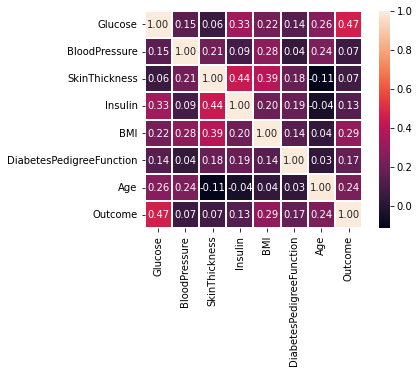

In [4]:
dataset = pd.read_csv('/content/diabetes2.csv')  #load your dataset
sn.heatmap(dataset.corr(), annot = True, linewidths = 1, linecolor = 'w', square = True, fmt = '.2f')  #plot the correlation matrix

In [5]:
data = dataset[['Glucose', 'BMI', 'Outcome']]  #choose your input and output variables according to the correlation heat map
data.head  #view the firt and last five values of your dataset

<bound method NDFrame.head of      Glucose   BMI  Outcome
0        148  33.6        1
1         85  26.6        0
2        183  23.3        1
3         89  28.1        0
4        137  43.1        1
..       ...   ...      ...
763      101  32.9        0
764      122  36.8        0
765      121  26.2        0
766      126  30.1        1
767       93  30.4        0

[768 rows x 3 columns]>

In [6]:
data.isnull().sum()  #check for any null values in your dataset

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [7]:
x = np.array(data[['Glucose', 'BMI']]).reshape(-1,2)  #select your input x features
y = np.array(data['Outcome']).reshape(-1,1)  #select you output y label
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)  #split your dataset into training and testing data

In [8]:
y_train = np.ravel(y_train) #flatten the data to a continuous block of 1D array and is similar to np.flatten()
train_accuracy = [] #create empty arrays to store the train and test accuracy scores for different values of k
test_accuracy = []

for i in range(1,10):  #normally k is chosen between 1 and 10
    cls = KNeighborsClassifier(n_neighbors=i)
    cls.fit(x_train, y_train)  #train your dataset

    train_accuracy.append(cls.score(x_train, y_train))  #append each accuracy score based on k value to your previously created arrays
    test_accuracy.append(cls.score(x_test, y_test))

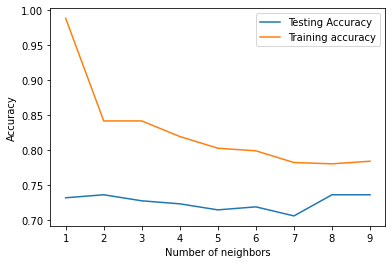

In [9]:
#plot your k vs accuracy plot
neighbors = np.arange(1,10) #define your x axis with the same range as above
plt.plot(neighbors, test_accuracy, label='Testing Accuracy') #plot your test and train accuracy curves
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors') 
plt.ylabel('Accuracy')
plt.show()

In [10]:
cls = KNeighborsClassifier(n_neighbors=8)  #now train your model with the best k value you obtain from the above graph
cls.fit(x_train, y_train)
cls.score(x_test, y_test) #check how your model performed (accuracy)

0.7359307359307359

In [11]:
x_pred = [[168, 38]]  #on any random glucose and bmi value check whether or not the patient has diabetes
pred = cls.predict(x_pred)
print(pred)

[1]


In [13]:
cls.predict(x_test) #predict your model's performance on your test (unseen) data

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

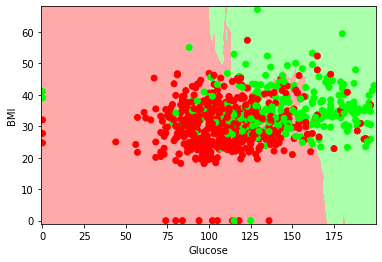

In [12]:
#plot your KNN classifier
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  #light red, light green - this resembles the classses: 0,1
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])   #red, #green 

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 # calculate the min, max limits - ranges (a,b) are always from a to b-1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()